# House Prices: Advanced Regression Techniques - Data Visualization and Model Analysis
We will explore the dataset with some key visualizations such as data distributions, correlation matrix, scatter plots, and residual analysis after fitting a linear regression model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
import numpy as np

# Check and replace infinite values manually
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (since we replaced inf with NaN)
data.dropna(subset=['SalePrice'], inplace=True)

# Now, we ensure that no inf values exist anymore
print(f"Number of inf values: {np.isinf(data['SalePrice']).sum()}")


Number of inf values: 0


### 1. Data Distribution
We will plot the distribution of house prices to visualize the spread of the target variable (`SalePrice`).

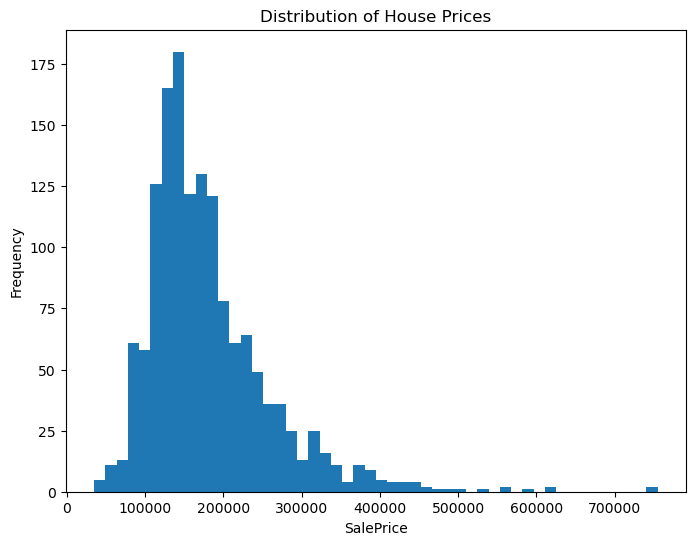

In [3]:
# Plot the distribution of house prices

# Alternative plotting approach with matplotlib
plt.figure(figsize=(8,6))
plt.hist(data['SalePrice'], bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


### 2. Correlation Matrix
We will plot the correlation matrix to check how features are correlated with each other and with the target variable.

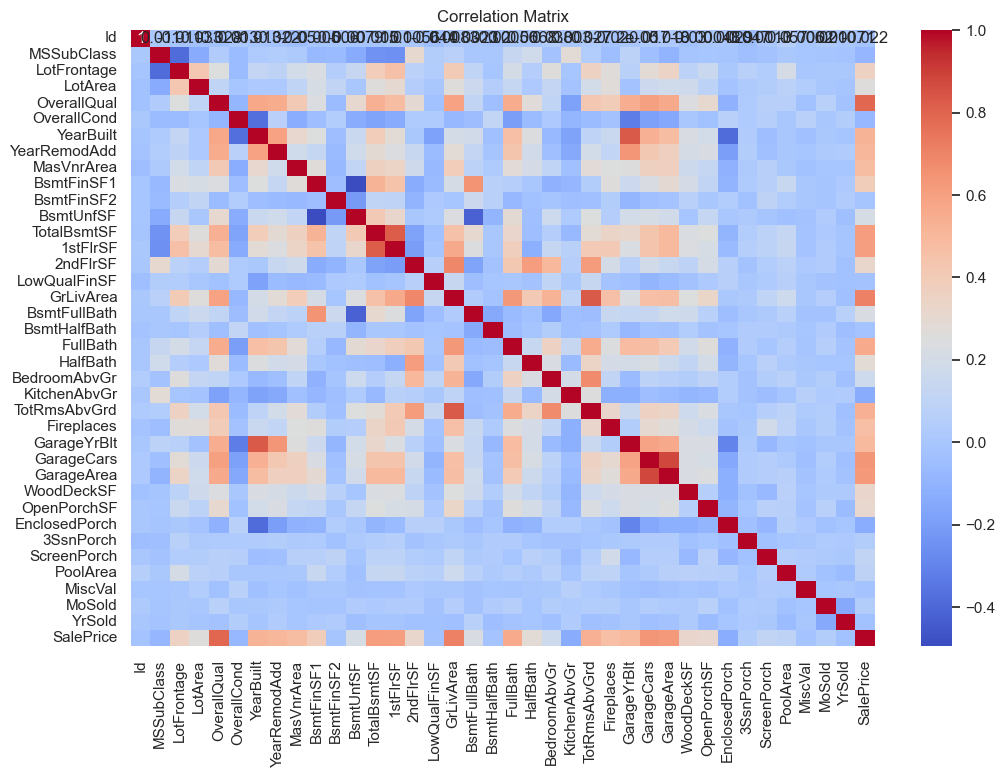

In [51]:
# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include=[float, int])

# Correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 3. Scatter Plots
Let's plot scatter plots between some important features (like `GrLivArea`, `OverallQual`) and the target variable `SalePrice`.

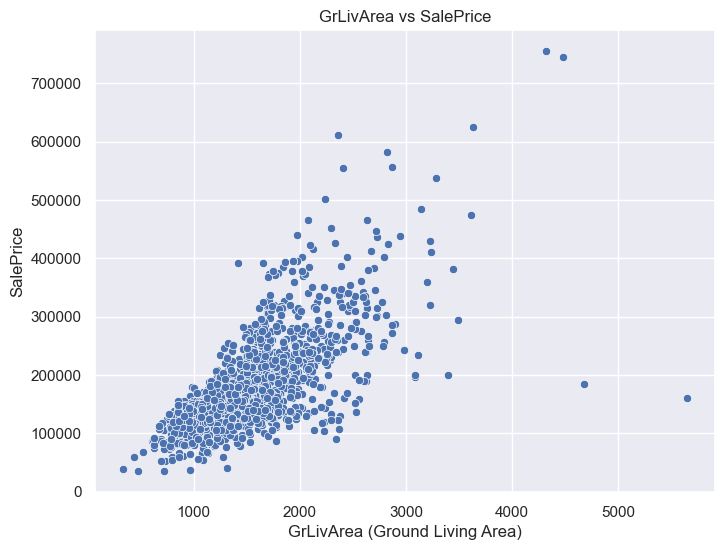

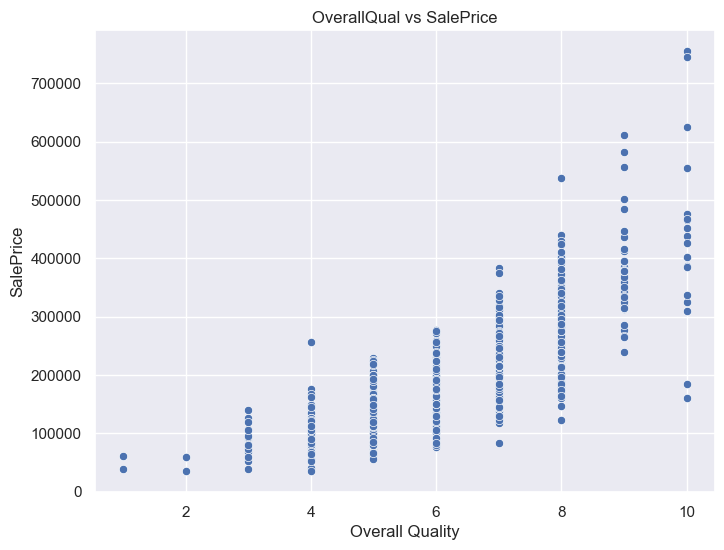

In [44]:
# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Ground Living Area)')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot for OverallQual vs SalePrice
plt.figure(figsize=(8,6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=data)
plt.title('OverallQual vs SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

### 4. Residual Analysis After Fitting Linear Regression
We will now fit a simple linear regression model and analyze the residuals.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


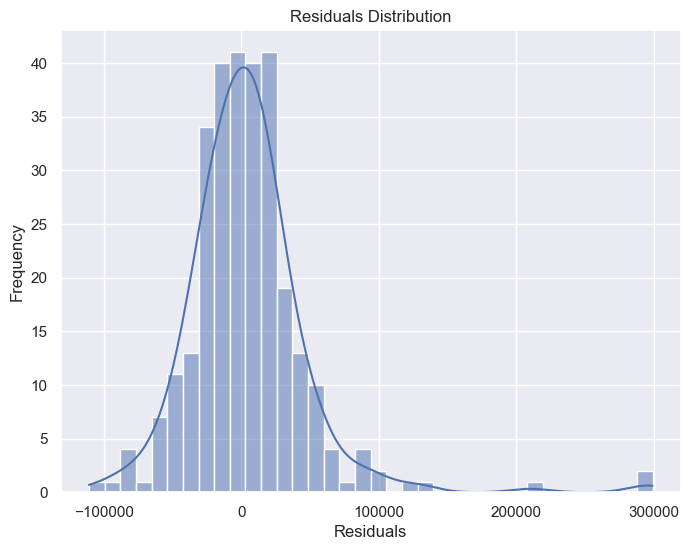

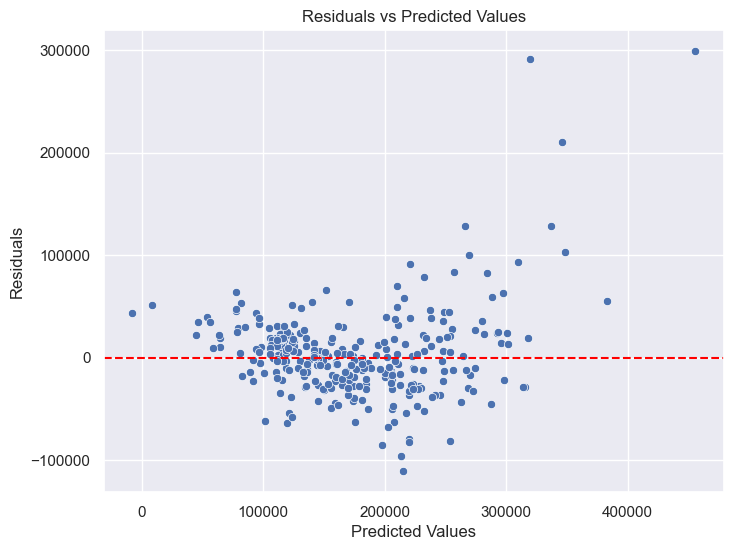

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select relevant features for the linear regression model
features = ['GrLivArea', 'OverallQual']
X = data[features]
y = data['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot the residuals distribution
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs predicted values to check for patterns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### 5. Learning Curves using Gradient Descent
Finally, let's visualize the learning curve for a model trained using gradient descent optimization.

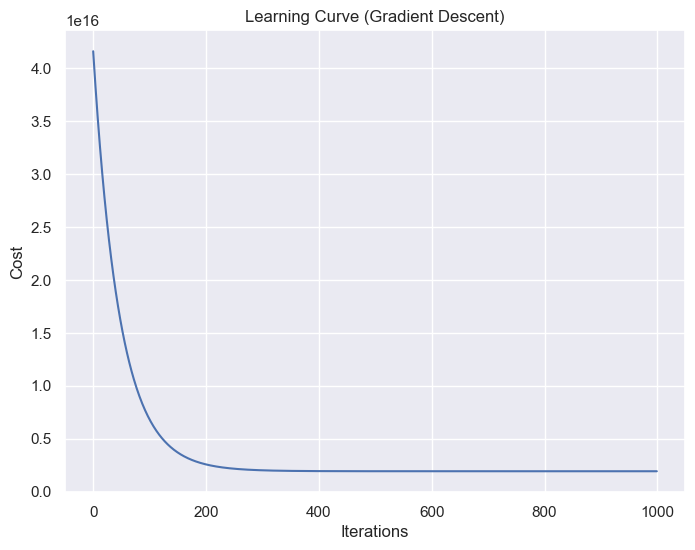

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features for gradient descent
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement gradient descent for a simple linear regression model
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost = (1/2*m) * np.sum(errors ** 2)
        cost_history.append(cost)
    
    return theta, cost_history

# Perform gradient descent
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add bias term
theta, cost_history = gradient_descent(X_b, y)

# Plot learning curves (cost vs iterations)
plt.figure(figsize=(8,6))
plt.plot(range(len(cost_history)), cost_history)
plt.title('Learning Curve (Gradient Descent)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()